In [ ]:
import numpy as np

n = 10
indices = np.arange(10)
print(indices)
np.random.choice(indices, 8, replace=False)

In [ ]:
A = np.array([[1,2, 2],[3,3, 1]])
np.random.choice(5, size=4)



In [ ]:
labels.reshape(1, -1)

In [ ]:
labels = np.array([1,2,3,1,2])
condition = (labels == 1)
print(condition)

X = np.array([[3,1], [1,4], [1,5], [9,2], [6,5]])
xx = X[condition]
print(xx)

xx.mean(axis=0)

In [70]:
import numpy as np

class KMeans:
    def __init__(self, k, max_iters=100):
      self.k = k
      self.X_train = None
      self.centroids = None
      self.max_iters = max_iters

    def fit(self, X):
        self.X_train = X
        n = len(X)
        if n < self.k:
            raise ValueError("data size too small")
        
        # init: pick k random centroids from data
        new_centroids = X[np.random.choice(n, size=self.k, replace=False)]

        iters = 0
        while (self.centroids != new_centroids).any() and iters < self.max_iters:
            self.centroids = new_centroids.copy()
            
            # assign all data points
            labels = self._assign_to_clusters(X, self.centroids)
    
            # re-find centroids
            for kk in range(self.k):
                cluster_points = X[labels == kk]
                if len(cluster_points) > 0:
                    new_centroids[kk] = cluster_points.mean(axis=0)
                else:
                    new_centroids[kk] = X[np.random.choice(n)]

            iters += 1

    def predict(self, X):
        return self._assign_to_clusters(X, self.centroids)
    
    def _assign_to_clusters(self, X, centroids):
        # X: (n, m)
        # centroids: (k, m)

        # (n, k)
        pairwise_squared_distances = np.sum((X[:, np.newaxis, :] - centroids[np.newaxis, :, :]) ** 2, axis=2)
        # (n,)
        return np.argmin(pairwise_squared_distances, axis=1)
        

In [48]:
X = np.array([[3,1], [1,4], [1,5], [9,2], [6,5]])
km = KMeans(2)

In [49]:
km.fit(X)

[[9 2]
 [1 5]]


In [50]:
km.centroids

array([[7, 3],
       [1, 3]])

# Test

Your centroids:
 [[ 0.94973532  4.41906906]
 [ 1.98258281  0.86771314]
 [-1.37324398  7.75368871]
 [-1.58438467  2.83081263]]

Sklearn centroids:
 [[ 0.94973532  4.41906906]
 [ 1.98258281  0.86771314]
 [-1.37324398  7.75368871]
 [-1.58438467  2.83081263]]


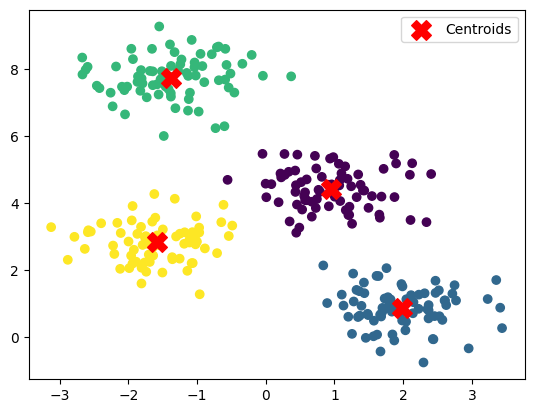

In [71]:
  from sklearn.datasets import make_blobs
  from sklearn.cluster import KMeans as SklearnKMeans
  import matplotlib.pyplot as plt

  # Generate synthetic data
  X, y_true = make_blobs(n_samples=300, centers=4,
                         cluster_std=0.60, random_state=0)

  # Test your implementation
  kmeans = KMeans(k=4, max_iters=100)
  kmeans.fit(X)
  y_pred = kmeans.predict(X)

  # Compare with sklearn
  sklearn_kmeans = SklearnKMeans(n_clusters=4, random_state=0)
  sklearn_labels = sklearn_kmeans.fit_predict(X)

  print("Your centroids:\n", kmeans.centroids)
  print("\nSklearn centroids:\n", sklearn_kmeans.cluster_centers_)

  # Visualize (optional)
  plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
  plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1],
              c='red', marker='X', s=200, label='Centroids')
  plt.legend()
  plt.show()

In [74]:
  from sklearn.datasets import make_blobs
  from sklearn.cluster import KMeans as SklearnKMeans
  import numpy as np

  # Generate synthetic data
  np.random.seed(42)  # For reproducibility
  X, y_true = make_blobs(n_samples=300, centers=4,
                         cluster_std=0.60, random_state=0)

  # Test your implementation (with fixed seed)
  np.random.seed(42)
  kmeans = KMeans(k=4, max_iters=100)
  kmeans.fit(X)
  y_pred = kmeans.predict(X)

  # Compare with sklearn
  sklearn_kmeans = SklearnKMeans(n_clusters=4, n_init=1, random_state=42)
  sklearn_labels = sklearn_kmeans.fit_predict(X)

  print("Your centroids:\n", kmeans.centroids)
  print("\nSklearn centroids:\n", sklearn_kmeans.cluster_centers_)

  # Check if they're close (may not be exact due to label permutation)
  print("\nYour inertia (within-cluster sum of squares):")
  inertia = np.sum((X - kmeans.centroids[y_pred]) ** 2)
  print(inertia)

  print("\nSklearn inertia:")
  print(sklearn_kmeans.inertia_)

  

Your centroids:
 [[-1.58438467  2.83081263]
 [ 1.98258281  0.86771314]
 [ 0.94973532  4.41906906]
 [-1.37324398  7.75368871]]

Sklearn centroids:
 [[ 1.98258281  0.86771314]
 [ 0.94973532  4.41906906]
 [-1.37324398  7.75368871]
 [-1.58438467  2.83081263]]

Your inertia (within-cluster sum of squares):
212.0059962108348

Sklearn inertia:
212.0059962108348
